In [1]:
from _utils import *
from _polychrom import *
import glob
import re

2024-11-04 14:28:23.600884: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 14:28:23.920259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_dir = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/figures/20241031'

In [3]:
def load_polymer_hdf5(polymer_directory, num_monomers=None, subsample_ratio=1):
    URIs = polychrom.hdf5_format.list_URIs(polymer_directory)
    if num_monomers is None:
        [num_monomers, _] = polychrom.hdf5_format.load_URI(URIs[0])["pos"].shape
    total_monomers = num_monomers
    num_monomers = num_monomers // subsample_ratio
    num_polymers = len(URIs)
    print(num_monomers, num_polymers)
    polys = np.full((num_monomers, 3, num_polymers), np.nan)
    dmaps = np.full((num_monomers, num_monomers, num_polymers), np.nan)
    for iURI, URI in tqdm(enumerate(URIs)):
        data = polychrom.hdf5_format.load_URI(URI)
        xyz = data["pos"]
        polys[:, :, iURI] = xyz[:total_monomers:subsample_ratio, :]
        dmaps[:, :, iURI] = squareform(pdist(xyz[:total_monomers:subsample_ratio, :]))
    return polys, dmaps

In [4]:
common_sim_dir = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results/'

# Find all folders in the common_sim_dir
# that starts with 20241028 using glob
sim_dirs = glob.glob(common_sim_dir + '20241031_Sox9_EmpiricalCTCF*Monomer1kb_Iter1')

In [5]:
sim_dirs

['/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results/20241031_Sox9_EmpiricalCTCF_Lifetime500_Separation500_Monomer1kb_Iter1',
 '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results/20241031_Sox9_EmpiricalCTCF_Lifetime500_Separation250_Monomer1kb_Iter1',
 '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results/20241031_Sox9_EmpiricalCTCF_Lifetime1000_Separation2000_Monomer1kb_Iter1',
 '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results/20241031_Sox9_EmpiricalCTCF_Lifetime2000_Separation500_Monomer1kb_Iter1',
 '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results/20241031_Sox9_EmpiricalCTCF_Lifetime4000_Separation2000_Monomer1kb_Iter1',
 '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/md_results/20241031_Sox

In [6]:
simulation_dataset = {}
for folder in tqdm(sim_dirs):
    # Extract the lifetime and separation parameters from file name
    filename = folder.split('/')[-1]
    lifetime_str = filename.split('_')[3]
    lifetime_int = int(re.search(r'\d+$', lifetime_str).group())
    separation_str = filename.split('_')[4]
    separation_int = int(re.search(r'\d+$', separation_str).group())
    print(f'Lifetime: {lifetime_int}, Separation: {separation_int}')
    
    # Check if the folder is empty
    if not os.listdir(folder):
        print(f'Folder {folder} is empty')
        continue
    
    # Check if the folder contains the polymer data
    if not glob.glob(folder + '/blocks*.h5'):
        print(f'Folder {folder} does not contain polymers.h5')
        continue
    
    # Load the polymer data
    polys, dmaps = load_polymer_hdf5(folder, 4000, 50)
    
    # Store the data in the simulation_dataset dictionary
    simulation_dataset[(lifetime_int, separation_int)] = {'polys': polys, 
                                                          'dmaps': dmaps}
    
    

  0%|          | 0/25 [00:00<?, ?it/s]

Lifetime: 500, Separation: 500
80 100


0it [00:00, ?it/s]

Lifetime: 500, Separation: 250
80 100


0it [00:00, ?it/s]

Lifetime: 1000, Separation: 2000
80 100


0it [00:00, ?it/s]

Lifetime: 2000, Separation: 500
80 100


0it [00:00, ?it/s]

Lifetime: 4000, Separation: 2000
80 100


0it [00:00, ?it/s]

Lifetime: 2000, Separation: 250
80 100


0it [00:00, ?it/s]

Lifetime: 4000, Separation: 250
80 100


0it [00:00, ?it/s]

Lifetime: 1000, Separation: 500
80 100


0it [00:00, ?it/s]

Lifetime: 4000, Separation: 500
80 100


0it [00:00, ?it/s]

Lifetime: 250, Separation: 2000
80 100


0it [00:00, ?it/s]

Lifetime: 4000, Separation: 100
80 100


0it [00:00, ?it/s]

Lifetime: 4000, Separation: 1000
80 100


0it [00:00, ?it/s]

Lifetime: 1000, Separation: 250
80 100


0it [00:00, ?it/s]

Lifetime: 500, Separation: 100
80 100


0it [00:00, ?it/s]

Lifetime: 1000, Separation: 100
80 100


0it [00:00, ?it/s]

Lifetime: 2000, Separation: 100
80 100


0it [00:00, ?it/s]

Lifetime: 250, Separation: 250
80 100


0it [00:00, ?it/s]

Lifetime: 1000, Separation: 1000
80 100


0it [00:00, ?it/s]

Lifetime: 500, Separation: 2000
80 100


0it [00:00, ?it/s]

Lifetime: 250, Separation: 100
80 100


0it [00:00, ?it/s]

Lifetime: 250, Separation: 500
80 100


0it [00:00, ?it/s]

Lifetime: 250, Separation: 1000
80 100


0it [00:00, ?it/s]

Lifetime: 2000, Separation: 2000
80 100


0it [00:00, ?it/s]

Lifetime: 500, Separation: 1000
80 100


0it [00:00, ?it/s]

Lifetime: 2000, Separation: 1000
80 100


0it [00:00, ?it/s]

In [7]:
len(simulation_dataset)

25

In [8]:
simulation_dmaps = {}
for key, value in simulation_dataset.items():
    curr_dmaps = value['dmaps']
    num_reps = curr_dmaps.shape[2]
    num_iters = 1  # Change here
    sample_dmaps = []
    for i in range(num_reps):
        for j in range(num_iters):
            start = j*80
            end = (j+1)*80
            dmap = curr_dmaps[start:end, start:end, i]
            sample_dmaps.append(dmap)
    simulation_dmaps[key] = np.array(sample_dmaps)

In [9]:
simulation_dataset.keys()

dict_keys([(500, 500), (500, 250), (1000, 2000), (2000, 500), (4000, 2000), (2000, 250), (4000, 250), (1000, 500), (4000, 500), (250, 2000), (4000, 100), (4000, 1000), (1000, 250), (500, 100), (1000, 100), (2000, 100), (250, 250), (1000, 1000), (500, 2000), (250, 100), (250, 500), (250, 1000), (2000, 2000), (500, 1000), (2000, 1000)])

In [10]:
simulation_dataset[(500, 500)]['dmaps'].shape

(80, 80, 100)

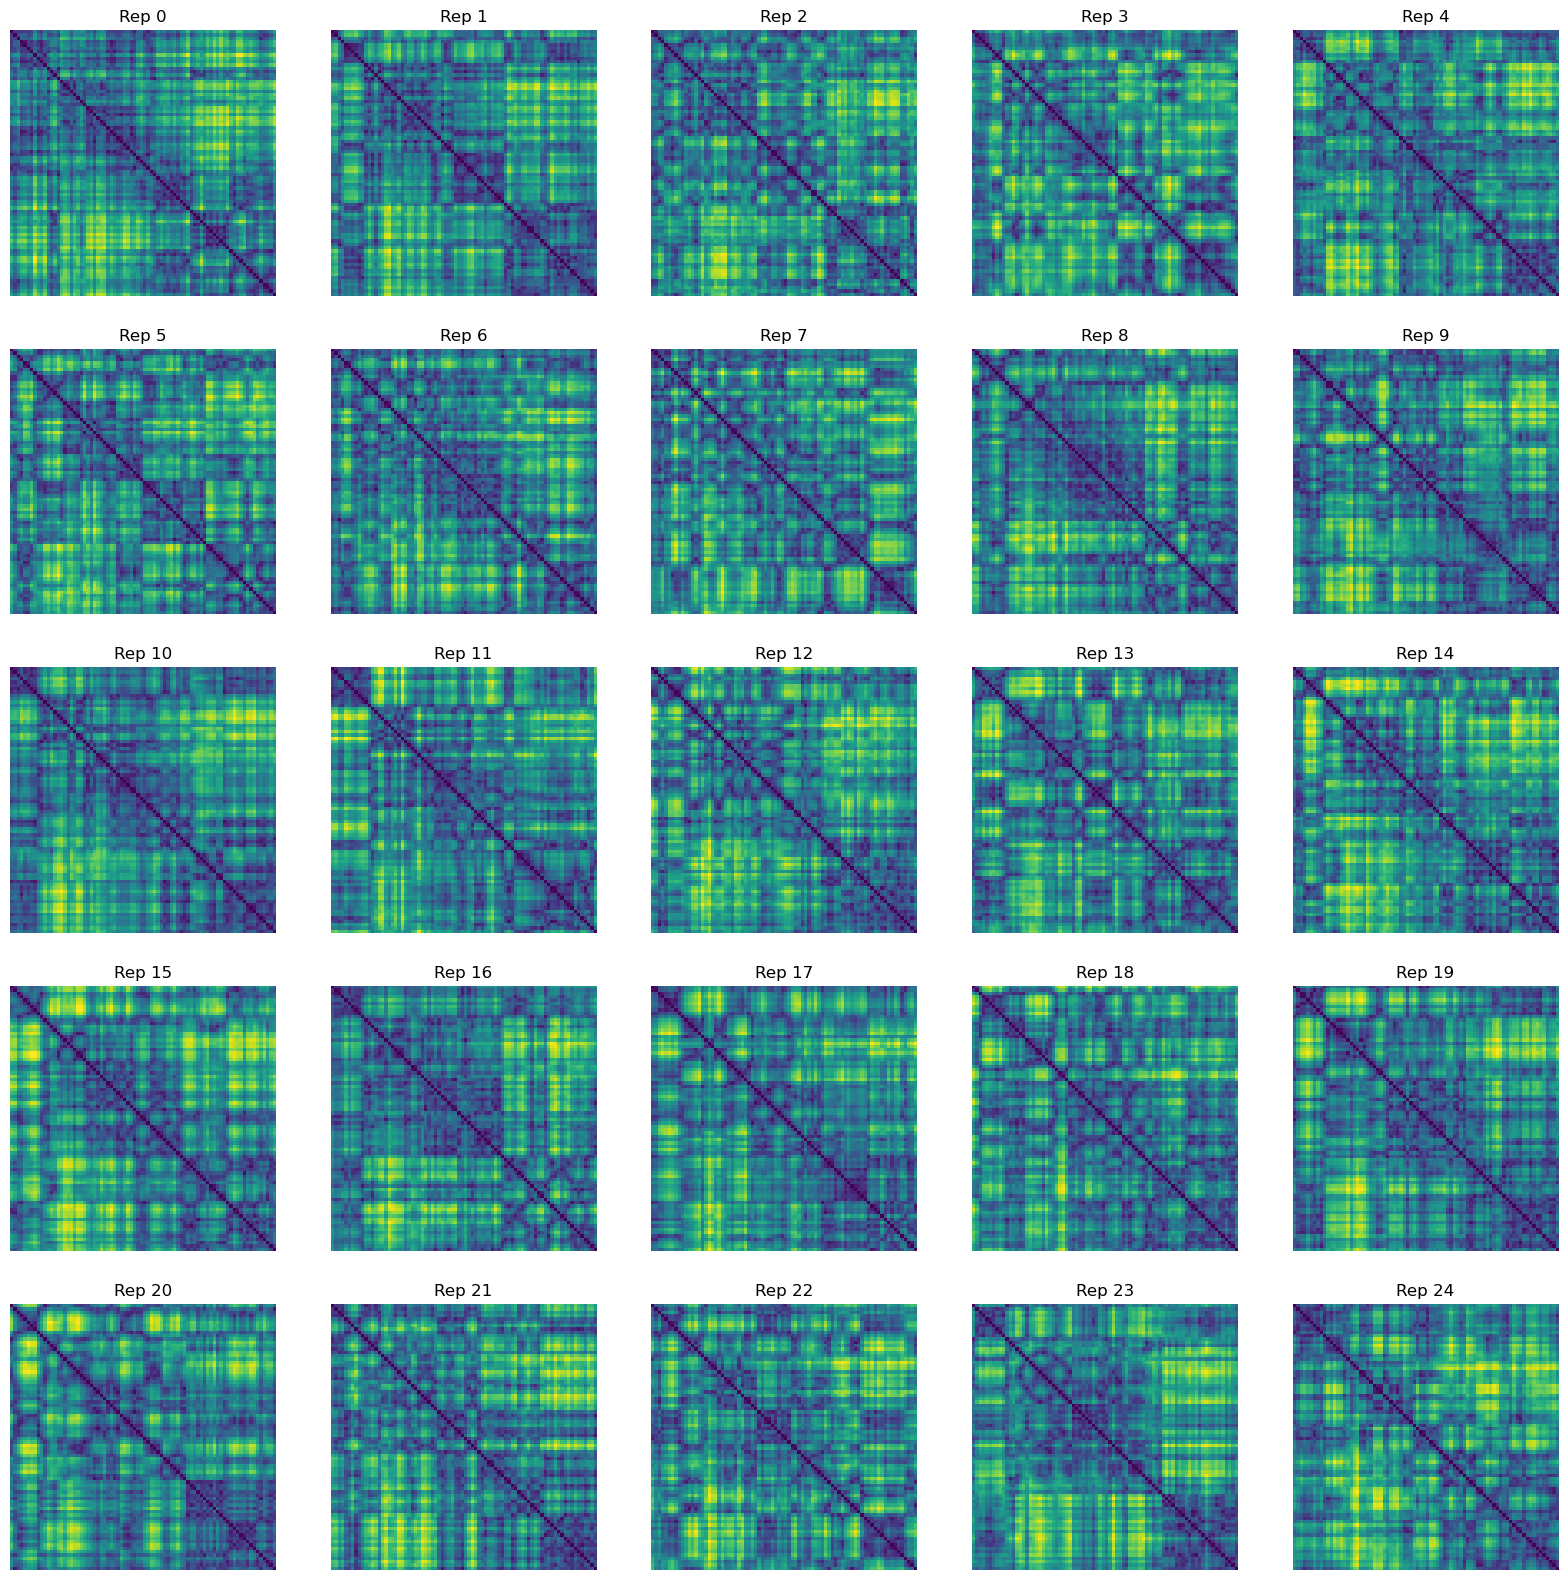

In [11]:
# Plot the first 25 distance maps from (250, 100) simulations
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(axs.flat):
    ax.imshow(simulation_dmaps[(250, 1000)][i])
    ax.set_title(f'Rep {i}')
    ax.axis('off')

In [12]:
simulation_dataset[(250, 1000)]['polys'][:, :, i]

array([[ 3.21000004e+00, -3.30999994e+00,  3.90000010e+00],
       [ 2.53999996e+00,  3.04999995e+00,  1.02399998e+01],
       [-8.00000012e-01,  1.33299999e+01,  9.26000023e+00],
       [-8.60999966e+00,  1.01199999e+01,  1.12399998e+01],
       [-4.17999983e+00,  8.39999962e+00,  8.85999966e+00],
       [-4.42000008e+00,  5.26999998e+00,  1.63799992e+01],
       [ 5.05000019e+00,  2.70000011e-01,  1.46999998e+01],
       [-1.40999997e+00,  1.04999995e+00,  9.30000019e+00],
       [ 8.19999993e-01, -3.55999994e+00,  1.98000002e+00],
       [-4.42999983e+00,  8.43999958e+00,  1.41700001e+01],
       [-5.26000023e+00,  2.11299992e+01,  1.48500004e+01],
       [-3.78999996e+00,  1.64500008e+01,  7.73000002e+00],
       [-1.07000005e+00,  2.71000004e+01,  8.68999958e+00],
       [ 8.60000014e-01,  2.06700001e+01,  8.93000031e+00],
       [ 7.38000011e+00,  1.95900002e+01,  1.18999996e+01],
       [ 1.11599998e+01,  6.38000011e+00,  6.61999989e+00],
       [ 4.50000000e+00,  1.13699999e+01

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


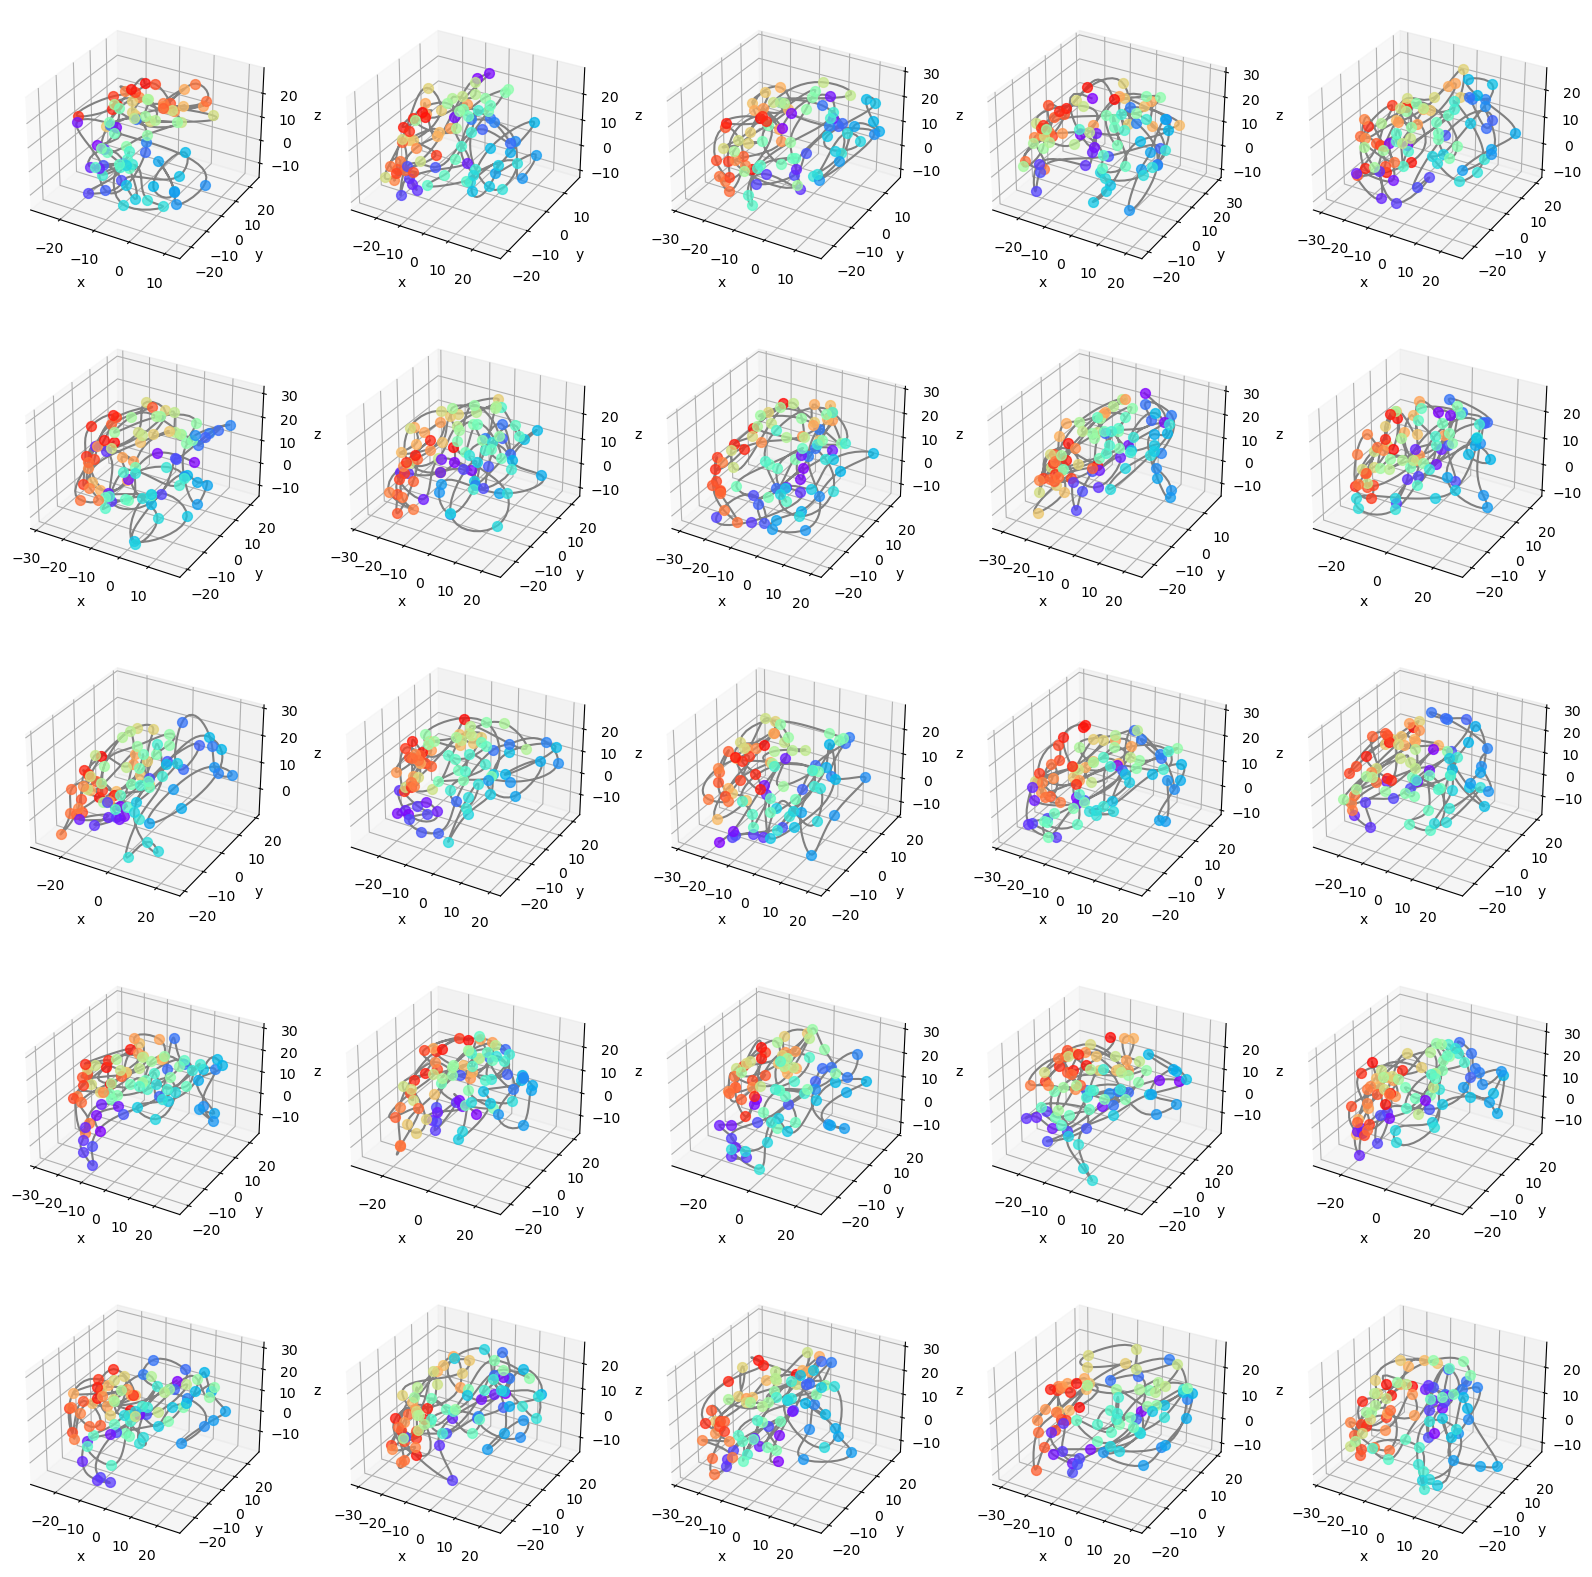

In [13]:
# Plot the first 25 polymers from (250, 100) simulations
# Use 3D scatter plto
fig, axs = plt.subplots(5, 5, figsize=(20, 20), subplot_kw={'projection': '3d'})
for i, ax in enumerate(axs.flat):
    print(i)
    visualize_polymer(simulation_dataset[(250, 1000)]['polys'][:, :, i], ax=ax)

In [16]:
simulation_median_dmaps = {}
for key, value in simulation_dmaps.items():
    median_dmap = np.median(value, axis=0)
    simulation_median_dmaps[key] = median_dmap

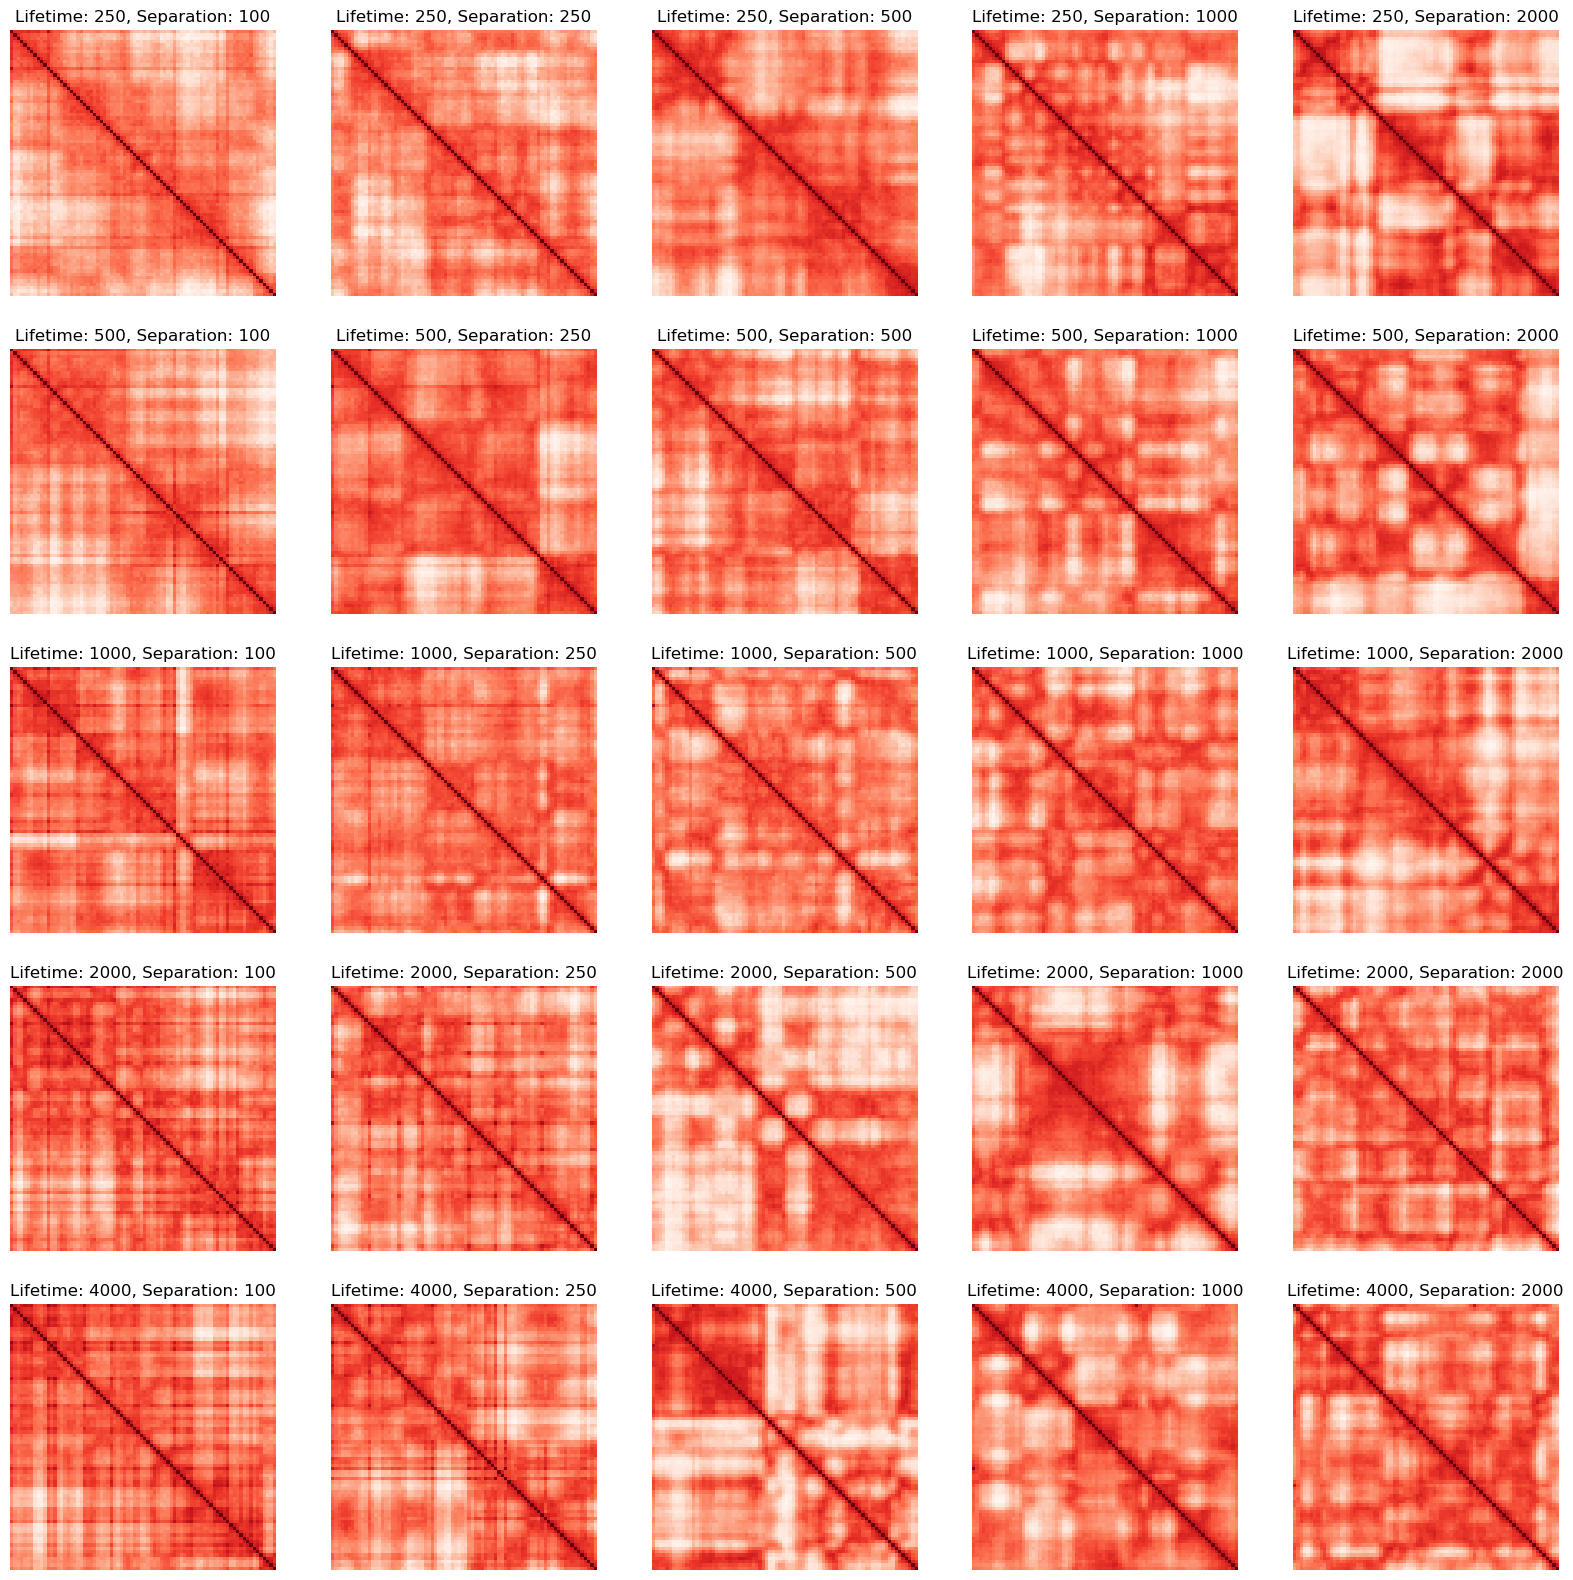

In [17]:
# Plot all 25 median distance maps
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
# Sort the keys by lifetime and separation
sorted_keys = sorted(simulation_median_dmaps.keys(), key=lambda x: (x[0], x[1]))
for i, key in enumerate(sorted_keys):
    ax[i//5, i%5].imshow(simulation_median_dmaps[key], cmap='Reds_r')
    ax[i//5, i%5].set_title(f'Lifetime: {key[0]}, Separation: {key[1]}')
    ax[i//5, i%5].axis('off')
    
plt.savefig(f'{save_dir}/median_distance_maps_simulations.png',
     bbox_inches='tight', dpi=300)

In [17]:
simulation_dataset[(4000, 100)]['dmaps'].shape

(80, 80, 100)

In [18]:
# Plot the PCA 
curr_dmaps = simulation_dataset[(4000, 100)]['dmaps']
curr_dmaps_flat = [curr_dmaps[:, :, i].flatten() for i in range(curr_dmaps.shape[2])]
pca = PCA(n_components=2)
pca.fit(curr_dmaps_flat)
curr_dmaps_pca = pca.transform(curr_dmaps_flat)

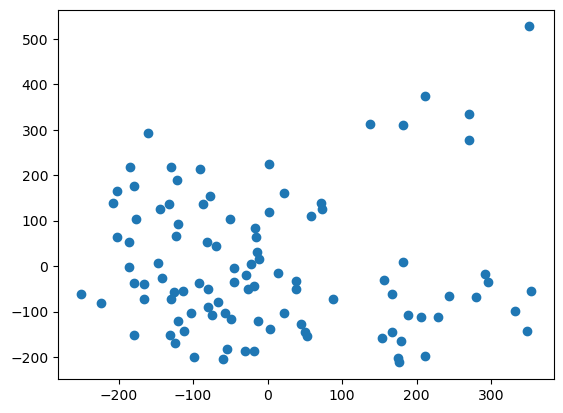

In [19]:
plt.scatter(curr_dmaps_pca[:, 0], curr_dmaps_pca[:, 1])
